In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Initial Transcript Collection Analysis

In [2]:
#import the Final Data dataset from the local file
data_df = pd.read_csv("Final_Data.csv")
print("Transcripts Collected: %d" %len(data_df))

Transcripts Collected: 1097


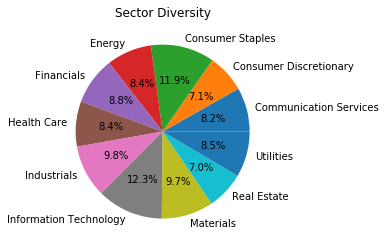

In [3]:
counts_df= data_df.groupby('Sector').count()['CEO']
plt.pie(counts_df.values, labels=counts_df.index, autopct='%1.1f%%')
plt.title('Sector Diversity')
plt.show()

## Features and Targets To Use in Analysis

In [4]:
features_list = ['CEOScore', 'AnalystScore', 'OtherExecScore', 'CEO_Word_Count', 'Analyst_Word_Count', 'OtherExec_Word_Count', \
               'CEO_Sent_Count', 'Analyst_Sent_Count', 'OtherExec_Sent_Count', 'CEO_Pos_Fin', 'CEO_Neg_Fin', 'CEO_Fin_Score2', \
               'Openness_Raw', 'Concientiousness_Raw', 'Extraversion_Raw', 'Agreeableness_Raw', 'Neuroticism_Raw']
feature_df  = data_df[features_list]
feature_df.head()

,CEOScore,AnalystScore,OtherExecScore,CEO_Word_Count,Analyst_Word_Count,OtherExec_Word_Count,CEO_Sent_Count,Analyst_Sent_Count,OtherExec_Sent_Count,CEO_Pos_Fin,CEO_Neg_Fin,CEO_Fin_Score2,Openness_Raw,Concientiousness_Raw,Extraversion_Raw,Agreeableness_Raw,Neuroticism_Raw
0,0.151,0.128,0.130,6672,3638,2290,366,230,154,13,6,0.368421,0.802708,0.665738,0.561661,0.706720,0.521500
1,0.158,0.176,0.160,6383,3580,1280,310,233,70,5,10,-0.333333,0.801802,0.660455,0.572874,0.697931,0.533246
2,0.127,0.095,0.152,4824,2003,3019,227,88,142,6,7,-0.076923,0.803711,0.677509,0.587895,0.695040,0.533590
3,0.145,0.087,0.119,2523,1670,1583,135,77,89,6,5,0.090909,0.796964,0.691372,0.581642,0.697082,0.547846
4,0.138,0.153,0.154,5464,4076,2295,287,262,142,12,4,0.500000,0.796617,0.672089,0.559625,0.701363,0.524434


In [6]:
target_list = ['twenty_ret', 'twentyfive_ret','thirty_ret','thirtyfive_ret']
target_df = data_df[target_list]
target_df.head()

,twenty_ret,twentyfive_ret,thirty_ret,thirtyfive_ret
0,-0.001409,0.043380,0.043318,0.028001
1,-0.006595,-0.025694,-0.110116,-0.093070
2,-0.007744,0.030827,-0.233609,-0.171353
3,0.057186,0.106747,0.147528,0.014441
4,-0.025019,-0.053231,0.061535,0.256574


In [7]:
target_feature_df = pd.concat([feature_df, target_df], axis=1)
target_feature_df.head()

,CEOScore,AnalystScore,OtherExecScore,CEO_Word_Count,Analyst_Word_Count,OtherExec_Word_Count,CEO_Sent_Count,Analyst_Sent_Count,OtherExec_Sent_Count,CEO_Pos_Fin,...,CEO_Fin_Score2,Openness_Raw,Concientiousness_Raw,Extraversion_Raw,Agreeableness_Raw,Neuroticism_Raw,twenty_ret,twentyfive_ret,thirty_ret,thirtyfive_ret
0,0.151,0.128,0.130,6672,3638,2290,366,230,154,13,...,0.368421,0.802708,0.665738,0.561661,0.706720,0.521500,-0.001409,0.043380,0.043318,0.028001
1,0.158,0.176,0.160,6383,3580,1280,310,233,70,5,...,-0.333333,0.801802,0.660455,0.572874,0.697931,0.533246,-0.006595,-0.025694,-0.110116,-0.093070
2,0.127,0.095,0.152,4824,2003,3019,227,88,142,6,...,-0.076923,0.803711,0.677509,0.587895,0.695040,0.533590,-0.007744,0.030827,-0.233609,-0.171353
3,0.145,0.087,0.119,2523,1670,1583,135,77,89,6,...,0.090909,0.796964,0.691372,0.581642,0.697082,0.547846,0.057186,0.106747,0.147528,0.014441
4,0.138,0.153,0.154,5464,4076,2295,287,262,142,12,...,0.500000,0.796617,0.672089,0.559625,0.701363,0.524434,-0.025019,-0.053231,0.061535,0.256574


## Drop NA Values

In [8]:
# # #drop rows with null values
# data_df.replace('nm', pd.np.nan, inplace=True)
# data_df = data_df.dropna()
# data_df = data_df.replace('%','',regex=True).astype('float')
print("%d Transcripts to use" %len(data_df))

1097 Transcripts to use


## Transform Data

In [9]:
#transformations already made
data_df['CEOScore_sqrt'] = np.power(data_df['CEOScore'], .5)
data_df.drop('CEOScore', axis=1, inplace=True)
data_df['CEO_Word_Count_sqrt'] = np.power(data_df['CEO_Word_Count'], .5)
data_df.drop('CEO_Word_Count', axis=1, inplace=True)
data_df['CEO_Sent_Count_sqrt'] = np.power(data_df['CEO_Sent_Count'], .5)
data_df.drop('CEO_Sent_Count', axis=1, inplace=True)
data_df['OtherExec_Sent_Count_sqrt'] = np.power(data_df['OtherExec_Sent_Count'], .5)
data_df.drop('OtherExec_Sent_Count', axis=1, inplace=True)
data_df['CEO_Pos_Fin_sqrt'] = np.power(data_df['CEO_Pos_Fin'], .5)
data_df.drop('CEO_Pos_Fin', axis=1, inplace=True)
data_df['AnalystScore_pwr'] = np.power(data_df['AnalystScore'], 1.7)
data_df.drop('AnalystScore', axis=1, inplace=True)
data_df['OtherExec_Word_Count_pwr'] = np.power(data_df['OtherExec_Word_Count'], .6)
data_df.drop('OtherExec_Word_Count', axis=1, inplace=True)
#change the feature list
features_list = ['CEOScore_sqrt', 'AnalystScore_pwr', 'OtherExecScore', 'CEO_Word_Count_sqrt', 'Analyst_Word_Count', 'OtherExec_Word_Count_pwr', \
               'CEO_Sent_Count_sqrt', 'Analyst_Sent_Count', 'OtherExec_Sent_Count_sqrt', 'CEO_Pos_Fin_sqrt', 'CEO_Neg_Fin', 'CEO_Fin_Score2', \
               'Openness_Raw', 'Concientiousness_Raw', 'Extraversion_Raw', 'Agreeableness_Raw', 'Neuroticism_Raw']

#make the scores positive
data_df['Openness_Raw'] = data_df['Openness_Raw'] + 1
data_df['Concientiousness_Raw'] = data_df['Concientiousness_Raw'] + 1
data_df['Extraversion_Raw'] = data_df['Extraversion_Raw'] + 1
data_df['Agreeableness_Raw'] = data_df['Agreeableness_Raw'] + 1
data_df['Neuroticism_Raw'] = data_df['Neuroticism_Raw'] + 1
for f in features_list:
    if data_df[f].min() <= 0:
        data_df[f] = data_df[f] + np.abs(data_df[f].min()) + 1

## Create Test/Train

In [12]:
#80% for training and 20% for test
test_train_percentage = .80

msk = np.random.rand(len(data_df)) < 0.8
train_df = data_df[msk]
print("%d Transcripts to Train on" %len(train_df))
test_df = data_df[~msk]
print("%d Transcripts to Test on" %len(test_df))

892 Transcripts to Train on
205 Transcripts to Test on


,Unnamed: 0,CEO,Ticker,Sector,Quarter,Year,Date,OtherExecScore,Analyst_Word_Count,Analyst_Sent_Count,...,T10_120,T10_30,Tax_Law,CEOScore_sqrt,CEO_Word_Count_sqrt,CEO_Sent_Count_sqrt,OtherExec_Sent_Count_sqrt,CEO_Pos_Fin_sqrt,AnalystScore_pwr,OtherExec_Word_Count_pwr
0,0,TomÂ Greco,AAP,Consumer Discretionary,Q3,2016,2016-11-15 22:57:00,1.130,3639,231,...,0.64,NaN,0.0,0.388587,81.682311,19.131126,13.409674,4.605551,1.030357,104.729262
1,1,ThomasÂ R.Â Greco,AAP,Consumer Discretionary,Q4,2016,2017-02-21 12:41:00,1.160,3581,234,...,0.66,NaN,0.0,0.397492,79.893679,17.606817,9.366600,3.236068,1.052164,74.168808
2,2,TomÂ Greco,AAP,Consumer Discretionary,Q1,2017,2017-05-24 08:00:00,1.152,2004,89,...,-0.21,-0.02,0.0,0.356371,69.455021,15.066519,12.916375,3.449490,1.018286,123.438463
3,3,TomÂ Greco,AAP,Consumer Discretionary,Q2,2017,2017-08-15 13:20:00,1.119,1671,78,...,0.01,NaN,0.0,0.380789,50.229473,11.618950,10.433981,3.449490,1.015746,84.116749
4,4,ThomasÂ R.Â Greco,AAP,Consumer Discretionary,Q3,2017,2017-11-14 14:45:00,1.154,4077,263,...,0.07,NaN,0.0,0.371484,73.918874,16.941074,12.916375,4.464102,1.041113,104.865093


## Write the Test and Train back to CSV Files

In [11]:
train_df.to_csv('Final_Data_Train.csv')
test_df.to_csv('Final_Data_Test.csv')